## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.124928  1.275749  0.978681 -1.528891 -0.487534 -1.179570
1 -1.205724 -1.186523 -0.003158 -0.160921  0.114990 -1.334723
2 -1.103299 -1.011415 -0.283435  0.705582  0.176252 -0.628460
3 -1.856567 -1.789584  0.736884 -1.334611  0.145885 -2.072286
4  1.123480 -1.627504 -0.009506 -1.177720 -0.281137 -1.862276


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9423062	total: 68.3ms	remaining: 1m 8s
1:	learn: 0.9333858	total: 68.9ms	remaining: 34.4s
2:	learn: 0.9241922	total: 69.7ms	remaining: 23.2s
3:	learn: 0.9154574	total: 70.4ms	remaining: 17.5s
4:	learn: 0.9085995	total: 71ms	remaining: 14.1s
5:	learn: 0.8992713	total: 71.5ms	remaining: 11.8s
6:	learn: 0.8888145	total: 72.2ms	remaining: 10.2s
7:	learn: 0.8785216	total: 72.6ms	remaining: 9.01s
8:	learn: 0.8709991	total: 73.2ms	remaining: 8.06s
9:	learn: 0.8637759	total: 73.7ms	remaining: 7.3s
10:	learn: 0.8555620	total: 74.2ms	remaining: 6.67s
11:	learn: 0.8468113	total: 74.7ms	remaining: 6.15s
12:	learn: 0.8368079	total: 75.2ms	remaining: 5.71s
13:	learn: 0.8279952	total: 75.6ms	remaining: 5.33s
14:	learn: 0.8208731	total: 76.1ms	remaining: 5s
15:	learn: 0.8141887	total: 76.7ms	remaining: 4.72s
16:	learn: 0.8065647	total: 77.2ms	remaining: 4.46s
17:	learn: 0.7989591	total: 77.7ms	remaining: 4.24s
18:	learn: 0.7912289	total: 78.3ms	remaining: 4.04

86:	learn: 0.4479858	total: 109ms	remaining: 1.14s
87:	learn: 0.4440998	total: 110ms	remaining: 1.14s
88:	learn: 0.4406802	total: 110ms	remaining: 1.13s
89:	learn: 0.4374184	total: 110ms	remaining: 1.12s
90:	learn: 0.4340956	total: 111ms	remaining: 1.11s
91:	learn: 0.4309109	total: 111ms	remaining: 1.1s
92:	learn: 0.4275682	total: 112ms	remaining: 1.09s
93:	learn: 0.4240116	total: 112ms	remaining: 1.08s
94:	learn: 0.4207954	total: 113ms	remaining: 1.07s
95:	learn: 0.4178438	total: 113ms	remaining: 1.06s
96:	learn: 0.4154034	total: 114ms	remaining: 1.06s
97:	learn: 0.4123946	total: 114ms	remaining: 1.05s
98:	learn: 0.4094508	total: 115ms	remaining: 1.04s
99:	learn: 0.4069085	total: 115ms	remaining: 1.03s
100:	learn: 0.4041922	total: 115ms	remaining: 1.03s
101:	learn: 0.4008881	total: 116ms	remaining: 1.02s
102:	learn: 0.3977045	total: 116ms	remaining: 1.01s
103:	learn: 0.3942406	total: 117ms	remaining: 1.01s
104:	learn: 0.3916765	total: 117ms	remaining: 1s
105:	learn: 0.3890409	total: 1

252:	learn: 0.1497492	total: 187ms	remaining: 554ms
253:	learn: 0.1488286	total: 188ms	remaining: 552ms
254:	learn: 0.1479238	total: 189ms	remaining: 551ms
255:	learn: 0.1472014	total: 189ms	remaining: 549ms
256:	learn: 0.1465579	total: 189ms	remaining: 548ms
257:	learn: 0.1457441	total: 190ms	remaining: 546ms
258:	learn: 0.1452096	total: 190ms	remaining: 545ms
259:	learn: 0.1446109	total: 191ms	remaining: 543ms
260:	learn: 0.1439498	total: 191ms	remaining: 541ms
261:	learn: 0.1431449	total: 192ms	remaining: 540ms
262:	learn: 0.1422590	total: 192ms	remaining: 538ms
263:	learn: 0.1414103	total: 193ms	remaining: 537ms
264:	learn: 0.1405334	total: 193ms	remaining: 535ms
265:	learn: 0.1397604	total: 193ms	remaining: 533ms
266:	learn: 0.1394050	total: 194ms	remaining: 532ms
267:	learn: 0.1386852	total: 194ms	remaining: 531ms
268:	learn: 0.1383196	total: 195ms	remaining: 529ms
269:	learn: 0.1379746	total: 195ms	remaining: 527ms
270:	learn: 0.1370392	total: 195ms	remaining: 526ms
271:	learn: 

473:	learn: 0.0498918	total: 292ms	remaining: 324ms
474:	learn: 0.0498196	total: 293ms	remaining: 323ms
475:	learn: 0.0496132	total: 293ms	remaining: 323ms
476:	learn: 0.0493814	total: 294ms	remaining: 322ms
477:	learn: 0.0493109	total: 294ms	remaining: 321ms
478:	learn: 0.0490511	total: 295ms	remaining: 321ms
479:	learn: 0.0487404	total: 295ms	remaining: 320ms
480:	learn: 0.0486652	total: 296ms	remaining: 319ms
481:	learn: 0.0485909	total: 296ms	remaining: 319ms
482:	learn: 0.0482611	total: 297ms	remaining: 318ms
483:	learn: 0.0480592	total: 298ms	remaining: 317ms
484:	learn: 0.0478280	total: 298ms	remaining: 316ms
485:	learn: 0.0476312	total: 298ms	remaining: 316ms
486:	learn: 0.0474141	total: 299ms	remaining: 315ms
487:	learn: 0.0473461	total: 299ms	remaining: 314ms
488:	learn: 0.0472789	total: 300ms	remaining: 313ms
489:	learn: 0.0471386	total: 300ms	remaining: 312ms
490:	learn: 0.0468468	total: 301ms	remaining: 312ms
491:	learn: 0.0467783	total: 301ms	remaining: 311ms
492:	learn: 

634:	learn: 0.0257039	total: 371ms	remaining: 213ms
635:	learn: 0.0256261	total: 372ms	remaining: 213ms
636:	learn: 0.0255345	total: 372ms	remaining: 212ms
637:	learn: 0.0255031	total: 373ms	remaining: 212ms
638:	learn: 0.0254136	total: 373ms	remaining: 211ms
639:	learn: 0.0252451	total: 374ms	remaining: 210ms
640:	learn: 0.0250811	total: 374ms	remaining: 210ms
641:	learn: 0.0249855	total: 375ms	remaining: 209ms
642:	learn: 0.0248641	total: 375ms	remaining: 208ms
643:	learn: 0.0247721	total: 375ms	remaining: 208ms
644:	learn: 0.0246656	total: 376ms	remaining: 207ms
645:	learn: 0.0245762	total: 376ms	remaining: 206ms
646:	learn: 0.0244723	total: 377ms	remaining: 206ms
647:	learn: 0.0243727	total: 377ms	remaining: 205ms
648:	learn: 0.0242611	total: 378ms	remaining: 204ms
649:	learn: 0.0241754	total: 378ms	remaining: 203ms
650:	learn: 0.0240771	total: 378ms	remaining: 203ms
651:	learn: 0.0239830	total: 379ms	remaining: 202ms
652:	learn: 0.0238795	total: 379ms	remaining: 201ms
653:	learn: 

853:	learn: 0.0144142	total: 476ms	remaining: 81.3ms
854:	learn: 0.0143819	total: 476ms	remaining: 80.8ms
855:	learn: 0.0143458	total: 477ms	remaining: 80.2ms
856:	learn: 0.0143189	total: 477ms	remaining: 79.6ms
857:	learn: 0.0142802	total: 478ms	remaining: 79.1ms
858:	learn: 0.0142485	total: 478ms	remaining: 78.5ms
859:	learn: 0.0142410	total: 478ms	remaining: 77.9ms
860:	learn: 0.0142056	total: 479ms	remaining: 77.3ms
861:	learn: 0.0141793	total: 479ms	remaining: 76.7ms
862:	learn: 0.0141482	total: 480ms	remaining: 76.2ms
863:	learn: 0.0141103	total: 480ms	remaining: 75.6ms
864:	learn: 0.0141029	total: 481ms	remaining: 75ms
865:	learn: 0.0140682	total: 481ms	remaining: 74.5ms
866:	learn: 0.0140292	total: 482ms	remaining: 73.9ms
867:	learn: 0.0140036	total: 482ms	remaining: 73.3ms
868:	learn: 0.0139963	total: 483ms	remaining: 72.8ms
869:	learn: 0.0139661	total: 483ms	remaining: 72.2ms
870:	learn: 0.0139081	total: 483ms	remaining: 71.6ms
871:	learn: 0.0138831	total: 484ms	remaining: 71

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

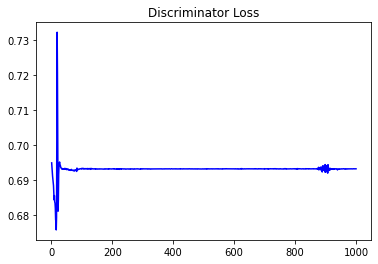

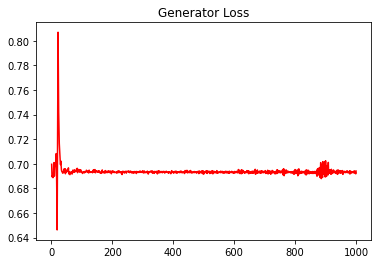

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.23706090249051048


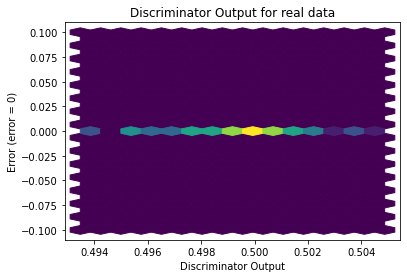

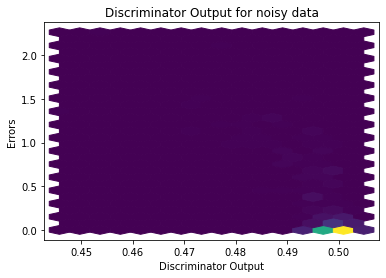

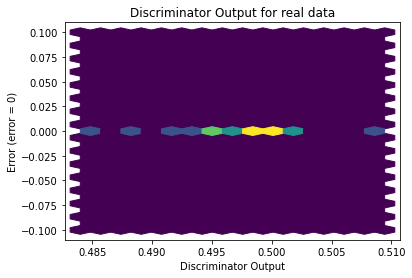

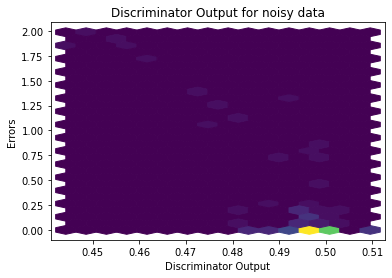

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


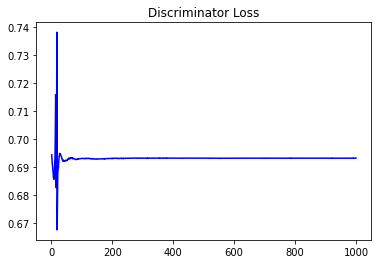

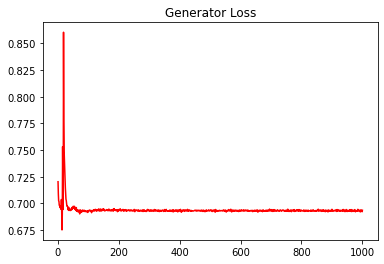

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.22142787665113053


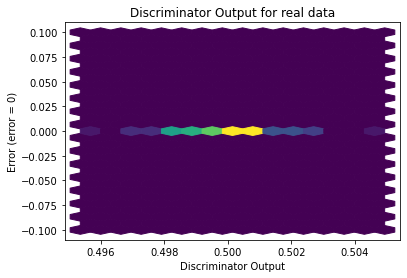

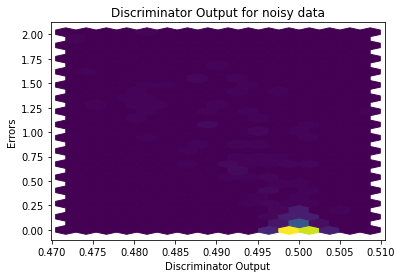

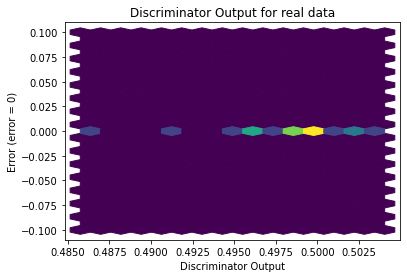

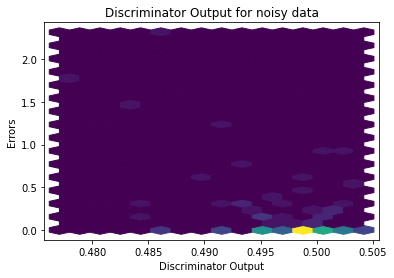

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5768]], requires_grad=True)
